In [5]:
##### Import libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import time
from datetime import datetime
from matplotlib import pyplot
from SaveModel import save_arch, save_history
import pickle
from keras.models import load_model

In [2]:
##### Import function from another py script
from DataPreparation import load

In [78]:
##### Callback for Tensorboard
tbCallBack = keras.callbacks.TensorBoard(log_dir='D:\GRAD_SCHOOL\Spring2017\CognitiveComputing&AI\midterm\Graph', histogram_freq=0, write_graph=True, write_images=True)

In [7]:
####### Load and display the data 
X, y = load()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [8]:
y

array([[ 0.38161111, -0.21757638, -0.40208334, ...,  0.44038889,
         0.03376389,  0.8259514 ],
       [ 0.4330242 , -0.21624877, -0.34668279, ...,  0.52398473,
        -0.08612007,  0.59259433],
       [ 0.3582826 , -0.26738405, -0.38800001, ...,  0.41946375,
        -0.01155797,  0.67042756],
       ..., 
       [ 0.40102914, -0.25295144, -0.37998059, ...,  0.38052428,
        -0.01551456,  0.75366992],
       [ 0.45343795, -0.1929708 , -0.40183941, ...,  0.72154742,
        -0.00937226,  0.89186132],
       [ 0.45054716, -0.32877925, -0.40111321, ...,  0.40483019,
         0.06266037,  0.7168113 ]], dtype=float32)

In [24]:
##### 1. Build model with following hyperparameters
model_name = 'model1'
nb_epoch = 100
validation_split = 0.2
lr = 0.01
momentum = 0.9
nesterov = True
#loss_method = 'mean_squared_error'
#arch_path = 'model/' + model_name + '-arch-' + str(nb_epoch) + '.json'
#weights_path = 'model/' + model_name + '-weights-' + str(nb_epoch) + '.hdf5'

# Build model
model1 = Sequential()
model1.add(Dense(100, input_dim=9216))
model1.add(Activation('relu'))
model1.add(Dense(30))


sgd = SGD(lr=lr, momentum=momentum, nesterov=nesterov)
model1.compile(loss=loss_method, optimizer=sgd)

start_time = time.time() #start time
print('start_time: %s' % (datetime.now()))
hist1 = model1.fit(X, y, nb_epoch=nb_epoch, validation_split=validation_split)
#print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
print('end_time: %s, duration(min): %d' % (datetime.now(), int(time.time()-start_time) / 60)) #end time

scores = model1.evaluate(X, y, verbose=0)
print(scores)

# serialize model to JSON
model_json = model1.to_json()
with open("final_model/"+"model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("final_model/"+"model11.h5")
print("Saved model to disk")


start_time: 2017-03-17 03:31:50.471412
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0452 - val_loss: 0.0145
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0122
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0113
Epoch 4/100
1712/1712 [==============================] - 1s - loss: 0.0105 - val_loss: 0.0109
Epoch 5/100
1712/1712 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0099
Epoch 6/100
1712/1712 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0086
Epoch 7/100
1712/1712 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0090
Epoch 8/100
1712/1712 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0081
Epoch 9/100
1712/1712 [==============================] - 1s - loss: 0.0078 - val_loss: 0.0079
Epoch 10/100
1712/1712 [==============================] - 1s - loss:

In [25]:
##### 2. Build model with following hyperparameters

nb_epoch = 100
validation_split = 0.2
#lr = 0.01
#momentum = 0.0
#nesterov = False
loss_method = 'mean_squared_error'

# Build model
model1_v2 = Sequential()
model1_v2.add(Dense(100, input_dim=9216))
model1_v2.add(Activation('relu'))
model1_v2.add(Dense(30))

#sgd = SGD(lr=lr, momentum=momentum, nesterov=nesterov)
model1_v2.compile(loss=loss_method, optimizer='sgd')

start_time = time.time() #start time
print('start_time: %s' % (datetime.now()))
hist2 = model1_v2.fit(X, y, nb_epoch=nb_epoch, validation_split=validation_split)
print('end_time: %s, duration(min): %d' % (datetime.now(), int(time.time()-start_time) / 60)) #end time

scores = model1_v2.evaluate(X, y, verbose=0)
print(scores)

# serialize model to JSON
model_json = model1_v2.to_json()
with open("final_model/"+"model1_v2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1_v2.save_weights("final_model/"+"model1_v2.h5")
print("Saved model to disk")

start_time: 2017-03-17 03:37:45.079368
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0514 - val_loss: 0.0259
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0235 - val_loss: 0.0212
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0204 - val_loss: 0.0192
Epoch 4/100
1712/1712 [==============================] - 1s - loss: 0.0186 - val_loss: 0.0191
Epoch 5/100
1712/1712 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0177
Epoch 6/100
1712/1712 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0165
Epoch 7/100
1712/1712 [==============================] - 0s - loss: 0.0161 - val_loss: 0.0174
Epoch 8/100
1712/1712 [==============================] - 0s - loss: 0.0154 - val_loss: 0.0150
Epoch 9/100
1712/1712 [==============================] - 0s - loss: 0.0151 - val_loss: 0.0149
Epoch 10/100
1712/1712 [==============================] - 0s - loss:

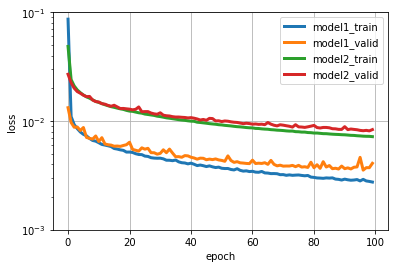

In [65]:
##### Comparing Model 1 and 2
pyplot.plot(hist1.history['loss'], linewidth=3, label='model1_train')
pyplot.plot(hist1.history['val_loss'], linewidth=3, label='model1_valid')
pyplot.plot(hist2.history['loss'], linewidth=3, label='model2_train')
pyplot.plot(hist2.history['val_loss'], linewidth=3, label='model2_valid')
pyplot.grid()
pyplot.legend()
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.ylim(1e-3, 1e-1)
pyplot.yscale('log')
pyplot.show()

ImageId    1783
Image      1783
dtype: int64


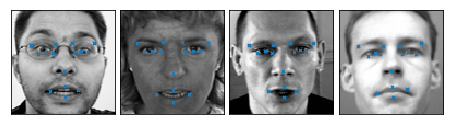

In [67]:
########## Prediction from Model 1
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = model1.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

ImageId    1783
Image      1783
dtype: int64


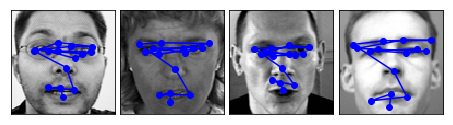

In [184]:
########## Prediction from Model 2
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)
    axis.plot(y[0::2] * 48 + 48, y[1::2] * 48 + 48, 'bo-') # connecting the points

X, _ = load(test=True)
y_pred = model2.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

In [ ]:
# Save the model
json_string = model.to_json()
open('model1.json', 'w').write(json_string)
model.save_weights('model1_weights.h5')